<a href="https://colab.research.google.com/github/adityaiyer8/face_detection/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
train_images = tf.data.Dataset.list_files('drive/MyDrive/test/images/*.jpg')
train_images.as_numpy_iterator().next()

b'drive/MyDrive/test/images/8ab9e708-9d4d-11ee-b09c-2ea2bcbcc786.jpg'

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
train_images = train_images.map(load_image)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[126, 120, 108],
        [123, 117, 105],
        [120, 114, 102],
        ...,
        [224, 229, 233],
        [223, 226, 231],
        [228, 231, 236]],

       [[126, 120, 108],
        [127, 121, 109],
        [122, 116, 104],
        ...,
        [223, 228, 232],
        [223, 226, 231],
        [227, 230, 235]],

       [[123, 117, 105],
        [130, 124, 112],
        [128, 122, 110],
        ...,
        [221, 226, 230],
        [221, 226, 230],
        [224, 229, 233]],

       ...,

       [[146, 101,  82],
        [146, 101,  82],
        [150, 105,  86],
        ...,
        [181, 174, 166],
        [225, 223, 211],
        [251, 251, 239]],

       [[150, 105,  86],
        [145, 100,  81],
        [146, 100,  84],
        ...,
        [172, 163, 154],
        [215, 211, 200],
        [250, 248, 236]],

       [[152, 107,  88],
        [148, 103,  84],
        [147, 101,  85],
        ...,
        [170, 161, 152],
        [210, 206, 195],
        [248, 246, 234]]

In [ ]:
image_generator = train_images.batch(4).as_numpy_iterator()

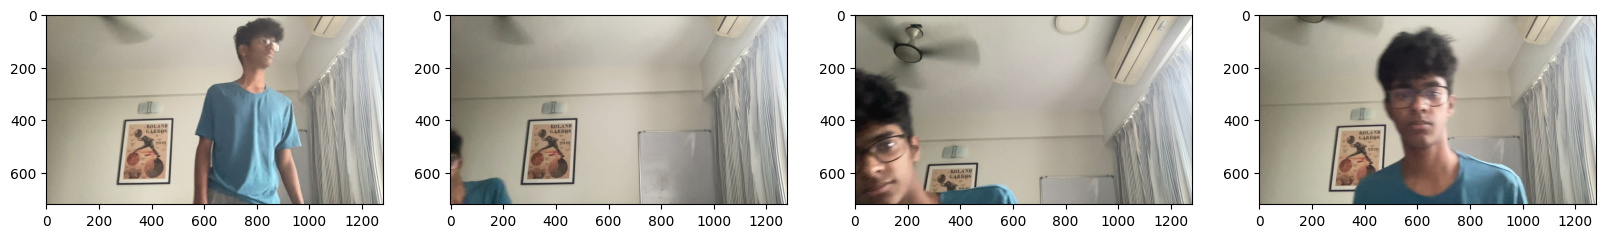

In [ ]:
plot_images = image_generator.next()

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
import random
import shutil

data_folder = "drive/MyDrive/"
train_folder = os.path.join(data_folder, "train", "images")
test_folder = os.path.join(data_folder, "test", "images")
val_folder = os.path.join(data_folder, "val", "images")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

image_files = [f for f in os.listdir(os.path.join(data_folder, "images")) if f.endswith(".jpg")]

random.seed(42)
random.shuffle(image_files)

train_size = int(0.7 * len(image_files))
test_size = int(0.15 * len(image_files))
val_size = len(image_files) - train_size - test_size

train_files = image_files[:train_size]
test_files = image_files[train_size:train_size + test_size]
val_files = image_files[train_size + test_size:]

for file in train_files:
    shutil.move(os.path.join(data_folder, "images", file), os.path.join(train_folder, file))

for file in test_files:
    shutil.move(os.path.join(data_folder, "images", file), os.path.join(test_folder, file))

for file in val_files:
    shutil.move(os.path.join(data_folder, "images", file), os.path.join(val_folder, file))

for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width = 680, height = 680),
                         alb.HorizontalFlip(p = 0.5),
                         alb.RandomBrightnessContrast(p = 0.2),
                         alb.RandomGamma(p = 0.2),
                         alb.RGBShift(p = 0.2),
                         alb.VerticalFlip(p = 0.5)],
                         bbox_params = alb.BboxParams(format = 'albumentations',
                                                      label_fields = ['class_labels']))

In [ ]:
img = cv2.imread(os.path.join('drive', 'MyDrive', 'train', 'images', '35d0a31c-9d4d-11ee-b09c-2ea2bcbcc786.jpg'))

In [ ]:
img.shape

(720, 1280, 3)

In [ ]:
with open(os.path.join('drive', 'MyDrive', 'train', 'labels', '35d0a31c-9d4d-11ee-b09c-2ea2bcbcc786.json'), 'r') as f:
  label = json.load(f)

In [ ]:
label['shapes'][0]

{'label': 'face',
 'points': [[768.804347826087, 81.73913043478261],
  [1170.9782608695652, 589.3478260869565]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[768.804347826087, 81.73913043478261, 1170.9782608695652, 589.3478260869565]

In [ ]:
coords = list(np.divide(coords, [1280, 720, 1280, 720]))

In [ ]:
coords

[0.6006283967391305,
 0.11352657004830918,
 0.9148267663043479,
 0.8185386473429952]

In [ ]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])

In [ ]:
augmented['bboxes']

[(0.0, 0.13331202046035806, 0.5149936061381073, 0.8797953964194374)]

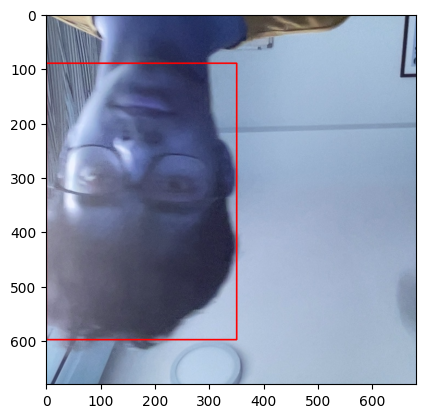

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [680, 680]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [680, 680]).astype(int)),
              (255, 0, 0),
              2)

plt.imshow(augmented['image'])

In [ ]:
for partition in ['train', 'test', 'val']:
  for image in os.listdir(os.path.join('drive', 'MyDrive', partition, 'images')):
    img = cv2.imread(os.path.join('drive', 'MyDrive', partition, 'images', image))

    coords = [0, 0, 0.00001, 0.00001]
    label_path = os.path.join('drive', 'MyDrive', partition, 'labels', f'{image.split(".")[0]}.json')
    if os.path.exists(label_path):
      with open(label_path, 'r') as f:
        label = json.load(f)

      if len(label['shapes']) > 0 and len(label['shapes'][0]['points']) > 0:
        coords[0] = label['shapes'][0]['points'][0][0]
        coords[1] = label['shapes'][0]['points'][0][1]
        coords[2] = label['shapes'][0]['points'][1][0]
        coords[3] = label['shapes'][0]['points'][1][1]
        coords = list(np.divide(coords, [1280, 720, 1280, 720]))

    try:
      for x in range(60):
        augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])
        cv2.imwrite(os.path.join('drive', 'MyDrive', 'augm_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

        annotation = {}
        annotation['image'] = image

        if os.path.exists(label_path):
          if len(augmented['bboxes']) == 0:
            annotation['bbox'] = [0,0,0,0]
            annotation['class'] = 0
          else:
            annotation['bbox'] = augmented['bboxes'][0]
            annotation['class'] = 1

        else:
          annotation['bbox'] = [0,0,0,0]
          annotation['class'] = 0

        with open(os.path.join('drive', 'MyDrive', 'augm_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
          json.dump(annotation, f)

    except Exception as e:
      print(e)

KeyboardInterrupt: ignored

In [ ]:
train_images = tf.data.Dataset.list_files('drive/MyDrive/augm_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

test_images = tf.data.Dataset.list_files('drive/MyDrive/augm_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

val_images = tf.data.Dataset.list_files('drive/MyDrive/augm_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.50980395, 0.6305011 , 0.6509804 ],
        [0.48496735, 0.6169934 , 0.654902  ],
        [0.6509804 , 0.7982571 , 0.8422658 ],
        ...,
        [0.84270155, 0.80740744, 0.6858388 ],
        [0.8392157 , 0.8039216 , 0.68235296],
        [0.8361652 , 0.8126358 , 0.6871456 ]],

       [[0.8091503 , 0.875817  , 0.84444445],
        [0.8745098 , 0.9607843 , 0.9490196 ],
        [0.7856209 , 0.8980393 , 0.9058824 ],
        ...,
        [0.8366015 , 0.8013073 , 0.6797387 ],
        [0.8352941 , 0.8       , 0.6784314 ],
        [0.8366015 , 0.8013073 , 0.6797387 ]],

       [[0.62483656, 0.6039216 , 0.5581699 ],
        [0.5869281 , 0.58431375, 0.53333336],
        [0.44052285, 0.45795208, 0.4130719 ],
        ...,
        [0.83355117, 0.79825705, 0.6766884 ],
        [0.8379085 , 0.79477125, 0.6771242 ],
        [0.84095865, 0.7978214 , 0.68017435]],

       ...,

       [[0.6400875 , 0.55773455, 0.4518522 ],
        [0.91895443, 0.84444463, 0.7150328 ],
        [0.88453156, 0

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding = 'utf-8') as f:
    label = json.load(f)

  return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('drive/MyDrive/augm_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('drive/MyDrive/augm_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('drive/MyDrive/augm_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.1627, 0.556 , 0.909 ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4020, 4020, 840, 840, 900, 900)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.9985 , 0.09814, 1.     , 0.8477 ],
        [0.4446 , 0.6665 , 0.689  , 0.994  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.3997 , 0.1345 , 0.9224 , 0.8457 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.5537 , 0.1427 , 1.     , 0.8013 ],
        [0.06476, 0.2715 , 0.3892 , 0.7144 ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

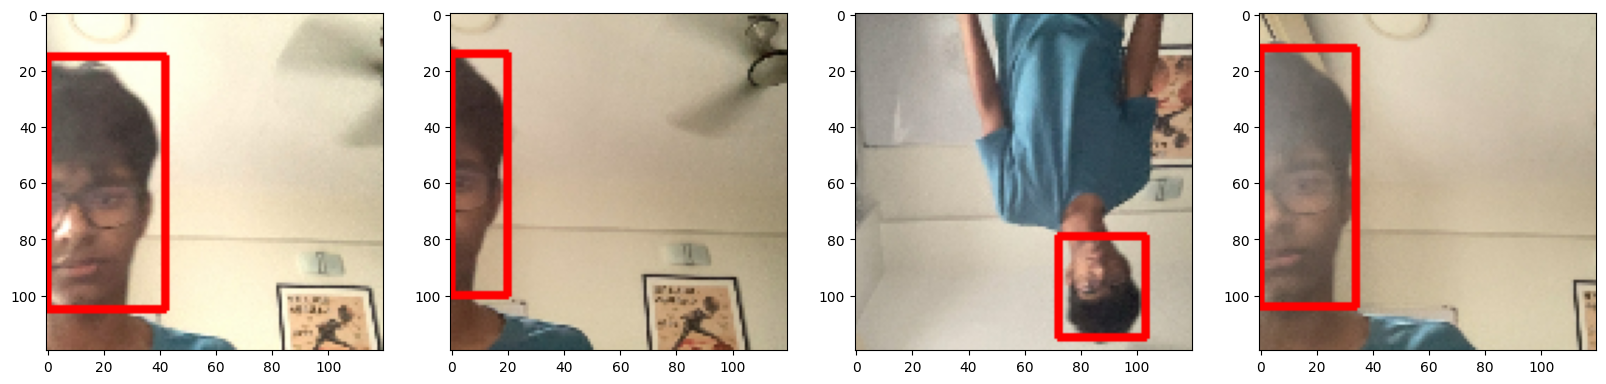

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model():
  input_layer = Input(shape = (120, 120, 3))
  vgg = VGG16(include_top = False)(input_layer)

  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation = 'relu')(f1)
  class2 = Dense(1, activation = 'sigmoid')(class1)

  f2 = GlobalMaxPooling2D()(vgg)
  reg1 = Dense(2048, activation = 'relu')(f2)
  reg2 = Dense(4, activation = 'sigmoid')(reg1)

  facetracker = Model(inputs = input_layer, outputs = [class2, reg2])
  return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

NameError: ignored

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

NameError: ignored